<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/Herbs_data_with_colored_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
# %cd


Mounted at /content/drive/


In [2]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs/ChineseHerbs",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs/ChineseHerbs",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 13098 images belonging to 11 classes.
Found 3268 images belonging to 11 classes.


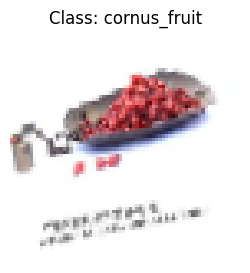

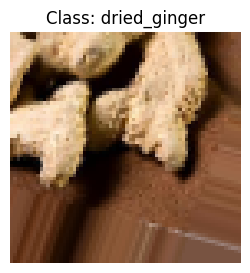

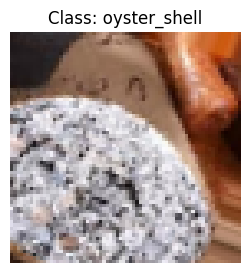

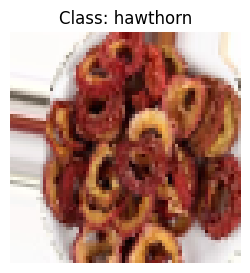

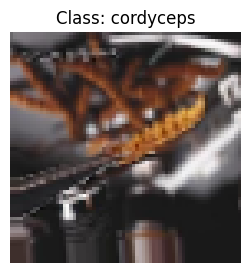

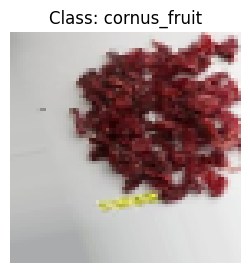

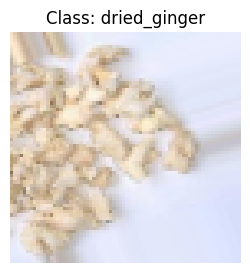

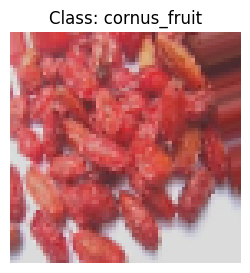

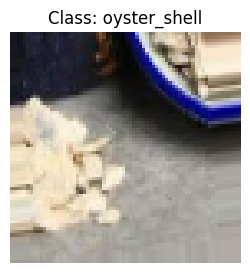

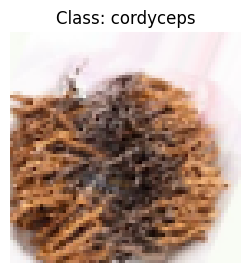

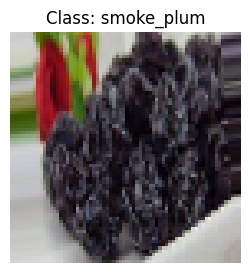

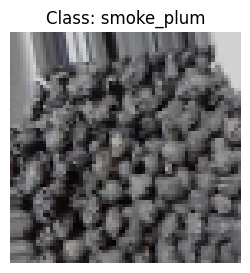

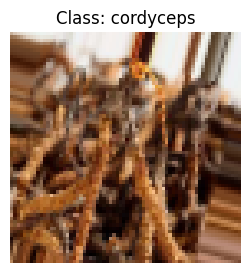

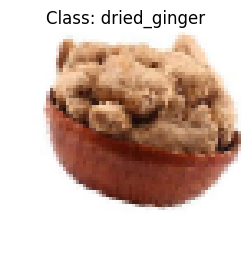

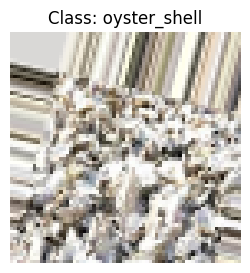

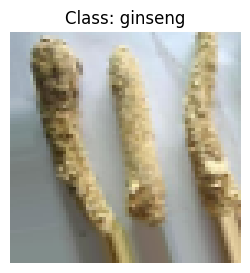

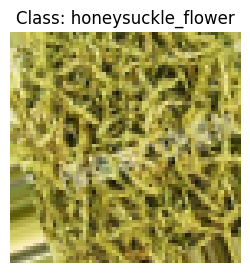

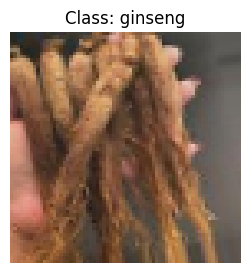

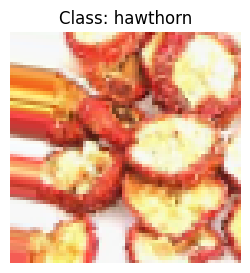

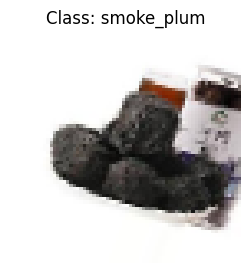

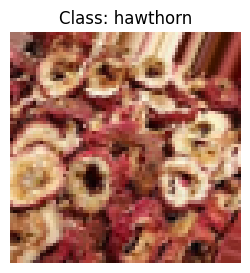

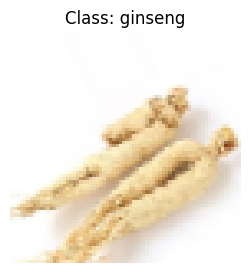

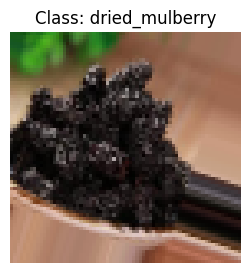

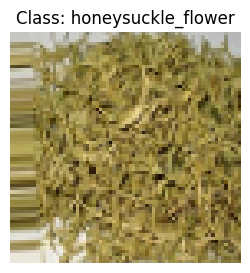

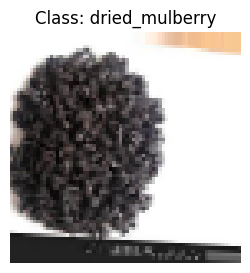

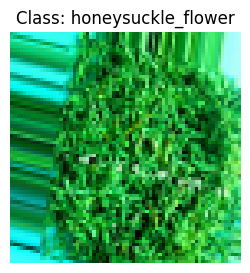

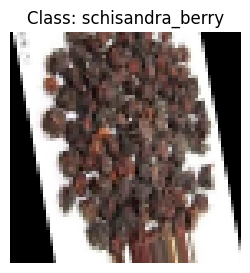

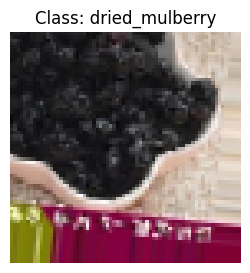

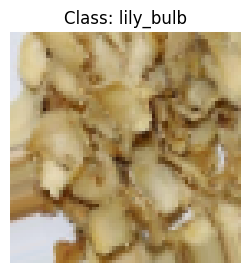

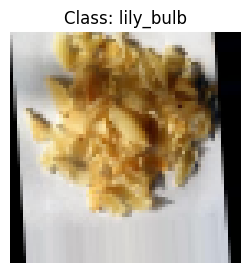

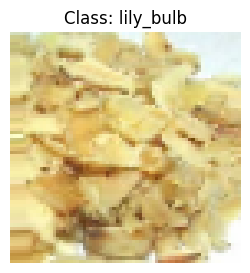

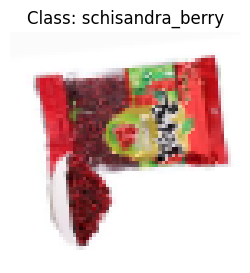

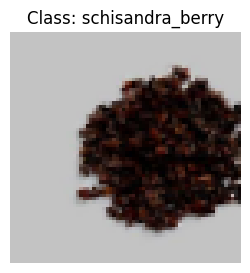

KeyboardInterrupt: 

In [3]:
class_counts = {}
for _ in range(train_generator.samples // train_generator.batch_size + 1):
    images, labels = next(train_generator)
    for i in range(len(images)):
        class_index = np.argmax(labels[i])
        class_name = list(train_generator.class_indices.keys())[class_index]

        if class_name not in class_counts:
            class_counts[class_name] = 0

        if class_counts[class_name] < 3:
            plt.figure(figsize=(3, 3))
            plt.imshow(images[i])
            plt.title(f"Class: {class_name}")
            plt.axis('off')
            plt.show()
            class_counts[class_name] += 1

In [3]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=80,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 4226s 3s/step - accuracy: 0.2881 - loss: 1.9005 - val_accuracy: 0.4884 - val_loss: 1.3207
Epoch 2/80
   1/1637 ━━━━━━━━━━━━━━━━━━━━ 1:38 60ms/step - accuracy: 0.6250 - loss: 0.9276

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1637/1637 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6250 - loss: 0.9276 - val_accuracy: 0.4844 - val_loss: 1.3527
Epoch 3/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 262s 141ms/step - accuracy: 0.4795 - loss: 1.3734 - val_accuracy: 0.5349 - val_loss: 1.2313
Epoch 4/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2500 - loss: 1.7734 - val_accuracy: 0.5312 - val_loss: 1.2158
Epoch 5/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 262s 156ms/step - accuracy: 0.5455 - loss: 1.2197 - val_accuracy: 0.5738 - val_loss: 1.1024
Epoch 6/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6250 - loss: 0.8690 - val_accuracy: 0.5735 - val_loss: 1.1006
Epoch 7/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 278s 145ms/step - accuracy: 0.5792 - loss: 1.1388 - val_accuracy: 0.5965 - val_loss: 1.0405
Epoch 8/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.6250 - loss: 1.0434 - val_accuracy: 0.6008 - val_loss: 1.0340
Epoch 9/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 258s 122ms/step - accuracy: 0.6090 - lo

In [4]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

model.save('simple_cnn_model.h5')

409/409 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.8041 - loss: 0.5954


Validation Loss: 0.545461118221283
Validation Accuracy: 0.8090575337409973


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255) # Rescaling only for test data

test_generator = test_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs_mini",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

#Evaluate the model.
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Found 55 images belonging to 11 classes.
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7500 - loss: 0.7836

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8021 - loss: 0.6687
Test Loss: 0.5853412747383118
Test Accuracy: 0.800000011920929


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


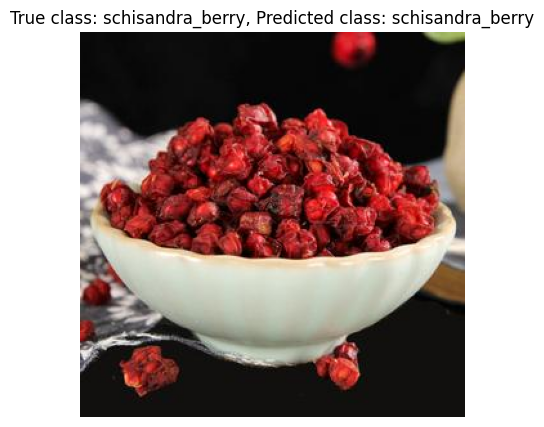

In [8]:
import os
import random
from PIL import Image

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


num_test_images = len(test_generator.filenames)
random_index = random.randint(0, num_test_images-1)
random_image_path = os.path.join(test_generator.directory, test_generator.filenames[random_index])
img = Image.open(random_image_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"True class: {class_labels[true_classes[random_index]]}, Predicted class: {class_labels[predicted_classes[random_index]]}")
plt.axis('off')
plt.show()